In [24]:
import kaggle as kaggle
import pandas as pd 


#  Download the dataset from Kaggle
!kaggle datasets download -d ajinkyachintawar/sales-and-customer-behaviour-insights


Dataset URL: https://www.kaggle.com/datasets/ajinkyachintawar/sales-and-customer-behaviour-insights
License(s): CC0-1.0
sales-and-customer-behaviour-insights.zip: Skipping, found more recently modified local copy (use --force to force download)


In [81]:
import glob

file_list = glob.glob('sales-and-customer-behaviour-insights/*.csv')
print(f"Found {len(file_list)} files: {file_list}")


# Load the dataset into a pandas DataFrame
dfs = [pd.read_csv(f) for f in file_list]

# Display the first few rows of each DataFrame
# print("Customer Info:")
# print(dfs[0].head())  
# print("\nProduct Info:")
# print(dfs[1].head())
# print("\nSales data:")
# print(dfs[2].head())

# Analysis sales per product
sales_data = dfs[2]
product_info = dfs[1]

product_merged = pd.merge(sales_data, product_info, on='product_id', how='left')
# print(product_merged.head())

product_sales_count = product_merged['product_id'].value_counts().reset_index()
# print("Sales Count per Product:")
# print(product_sales_count.head())

# Analysis total sales per product

product_merged['quantity'] = pd.to_numeric(product_merged['quantity'], errors='coerce').fillna(0)

product_sales = product_merged.groupby('product_id')["quantity"].sum().reset_index()
product_sales = product_sales.sort_values(by='quantity', ascending=False)
# print("Total Sales per Product:")
# print(product_sales.head())

#  Average sold per product
average_sales = product_merged.groupby('product_id')["quantity"].mean().reset_index()
average_sales = average_sales.sort_values(by='quantity', ascending=False)
# print("Average Sales per Product:")
# print(average_sales.head())

average_total_sales = pd.merge(average_sales, product_sales, on='product_id', how='left', suffixes=('_average', '_total'))
sale_stats = pd.merge(average_total_sales, product_sales_count, on='product_id', how='left')
print("Average and Total Sales per Product:")
print(sale_stats.head())


Found 3 files: ['sales-and-customer-behaviour-insights\\customer_info.csv', 'sales-and-customer-behaviour-insights\\product_info.csv', 'sales-and-customer-behaviour-insights\\sales_data.csv']
Average and Total Sales per Product:
  product_id  quantity_average  quantity_total  count
0      P0024          3.252747           296.0     91
1      P0015          3.250000           351.0    108
2      P0014          3.227273           355.0    110
3      P0019          3.219780           293.0     91
4      P0004          3.204082           314.0     98


C:\Users\paula\AppData\Local\Temp\ipykernel_14516\619804691.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)


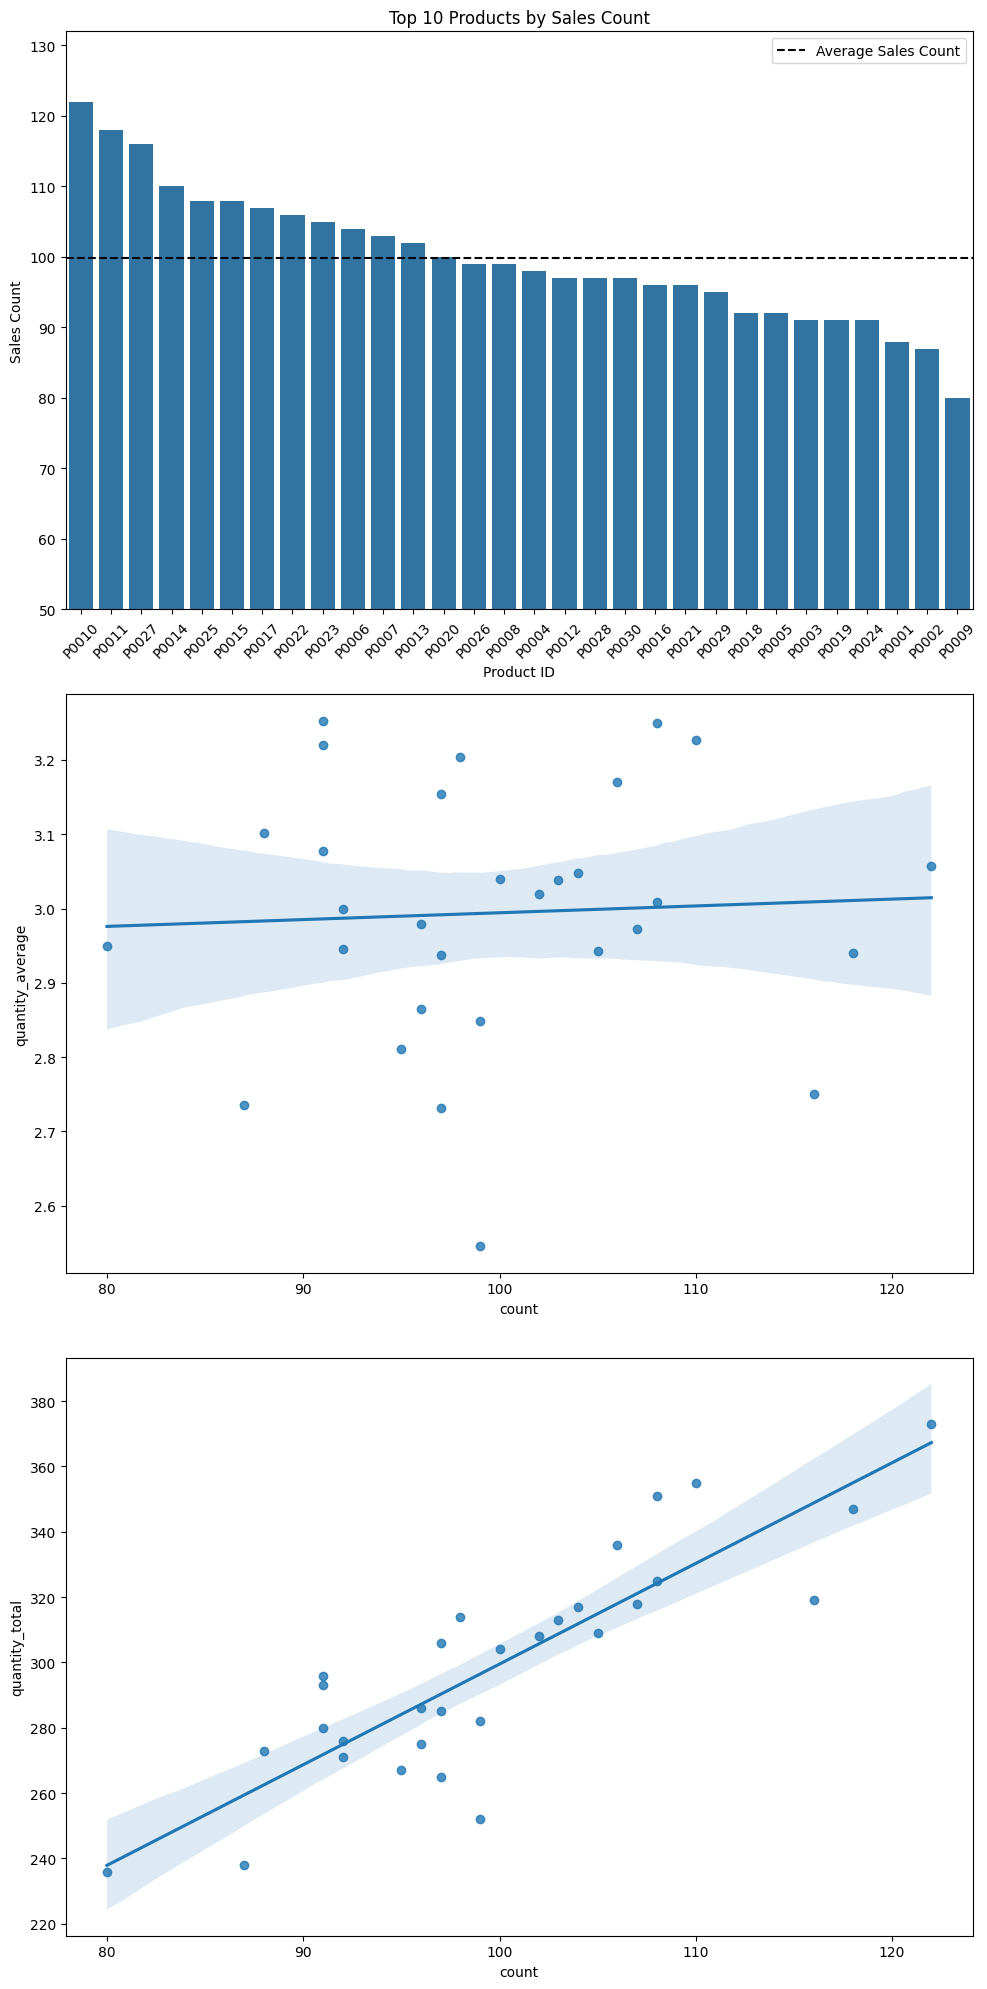

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize sales per product

fig, ax = plt.subplots(3, 1, figsize=(10, 20))

sns.barplot(data=product_sales_count, x="product_id", y="count", ax=ax[0])
ax[0].set_title('Top 10 Products by Sales Count')
ax[0].set_xlabel('Product ID')
ax[0].set_ylabel('Sales Count')
ax[0].set_ylim(50, product_sales_count['count'].max() + 10)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
ax[0].axhline(y=product_sales_count['count'].mean(), color='black', linestyle='--', label='Average Sales Count')
ax[0].legend()

sns.regplot(data=sale_stats, x="count", y="quantity_average", ax=ax[1])
sns.regplot(data=sale_stats, x="count", y="quantity_total", ax=ax[2])

plt.tight_layout()
plt.show()